# Digital Beamforming


1. Parameters:
    - Define the number of antenna elements, the distance between them (in wavelengths), and the desired beam direction (in degrees).
2. Phase Shifts and Steering Vector:
    - Calculate phase shifts and create the steering vector for the desired beam direction.
3. Simulate a Signal:
    - Generate an example signal for demonstration.
4. Apply Beamforming:
    - Apply the steering vector to the signal to form the beam.
5. Calculate Antenna Pattern:
    - Calculate the array factor over a range of angles from -90 to 90 degrees.
6. Normalize the array factor for plotting.
    - Plot the beamforming output (real and imaginary parts).
    - Plot the antenna pattern in dB, showing the normalized array factor vs. angle.

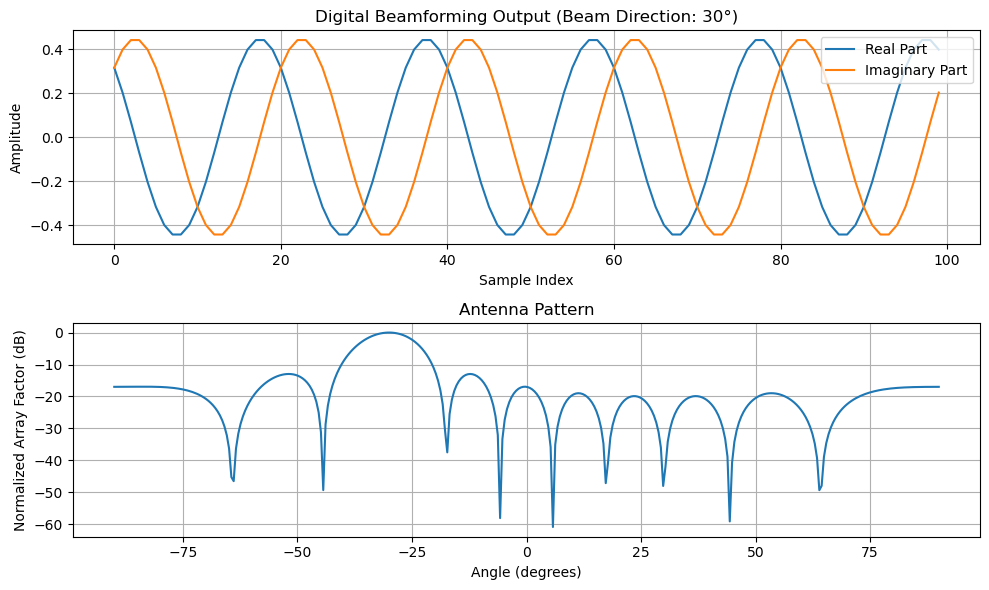

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_elements = 10  # Number of antenna elements
d = 0.5  # Distance between elements (in wavelengths)
theta_deg = 30  # Desired beam direction (in degrees)
theta = np.radians(theta_deg)

# Calculate phase shifts
phase_shifts = np.exp(1j * 2 * np.pi * d * np.arange(num_elements) * np.sin(theta))

# Create steering vector
steering_vector = phase_shifts / np.sqrt(num_elements)

# Simulate a signal
num_samples = 100
signal = np.exp(1j * 2 * np.pi * 0.05 * np.arange(num_samples))  # Example signal

# Apply beamforming
beamformed_signal = np.zeros(num_samples, dtype=complex)
for i in range(num_elements):
    beamformed_signal += steering_vector[i] * signal

# Calculate antenna pattern
angles = np.linspace(-np.pi / 2, np.pi / 2, 360)  # Angle range from -90 to 90 degrees
array_factor = np.zeros_like(angles, dtype=complex)

for i, angle in enumerate(angles):
    phase_shift = np.exp(1j * 2 * np.pi * d * np.arange(num_elements) * np.sin(angle))
    array_factor[i] = np.abs(np.dot(steering_vector, phase_shift))

array_factor = array_factor / np.max(array_factor)  # Normalize array factor

# Plot results
plt.figure(figsize=(10, 6))

# Beamforming Output
plt.subplot(2, 1, 1)
plt.plot(np.real(beamformed_signal), label='Real Part')
plt.plot(np.imag(beamformed_signal), label='Imaginary Part')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title(f'Digital Beamforming Output (Beam Direction: {theta_deg}°)')
plt.legend()
plt.grid(True)

# Antenna Pattern
plt.subplot(2, 1, 2)
plt.plot(np.degrees(angles), 20 * np.log10(array_factor))
plt.xlabel('Angle (degrees)')
plt.ylabel('Normalized Array Factor (dB)')
plt.title('Antenna Pattern')
plt.grid(True)

plt.tight_layout()
plt.show()
